# 1. Import Library

In [211]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [212]:
path_electricity_generation_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\Electricity_Generation_Processed.csv"
path_population_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\population_monthly.csv"
path_sunshine_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\sunshine_monthly.csv"
path_humidity_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-temperature-handled-data.csv"

In [213]:
path_electricity_generation_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\Electricity_Generation_Processed.csv"
path_population_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\population_monthly.csv"
path_sunshine_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\sunshine_monthly.csv"
path_humidity_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-temperature-handled-data.csv"

In [214]:
electricity_df_train = pd.read_csv(path_electricity_generation_train)
population_df_train = pd.read_csv(path_population_train)
sunshine_df_train = pd.read_csv(path_sunshine_train)
humidity_df_train = pd.read_csv(path_humidity_train)
rainfall_df_train = pd.read_csv(path_rainfall_train)
temperature_df_train = pd.read_csv(path_temperature_train)

In [215]:
electricity_df_test = pd.read_csv(path_electricity_generation_test)
population_df_test = pd.read_csv(path_population_test)
sunshine_df_test = pd.read_csv(path_sunshine_test)
humidity_df_test = pd.read_csv(path_humidity_test)
rainfall_df_test = pd.read_csv(path_rainfall_test)
temperature_df_test = pd.read_csv(path_temperature_test)

In [216]:
path_electricity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity.pkl"
path_population_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\population.pkl"
path_sunshine_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\sunshine.pkl"
path_humidity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\humidity.pkl"
path_rainfall_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\rainfall.pkl"
path_temperature_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\temperature.pkl"

In [217]:
# List các đường dẫn
paths = [
    path_electricity_generation_train,
    path_population_train,
    path_sunshine_train,
    path_humidity_train,
    path_rainfall_train,
    path_temperature_train,
]

In [218]:
YEARS = [year for year in range(2002, 2023)]

In [219]:
MONTHS = [month for month in range(1, 13)]

# 2. Prediction Using ARIMA Model

## 2.1 Check for stationarity using time series plotting

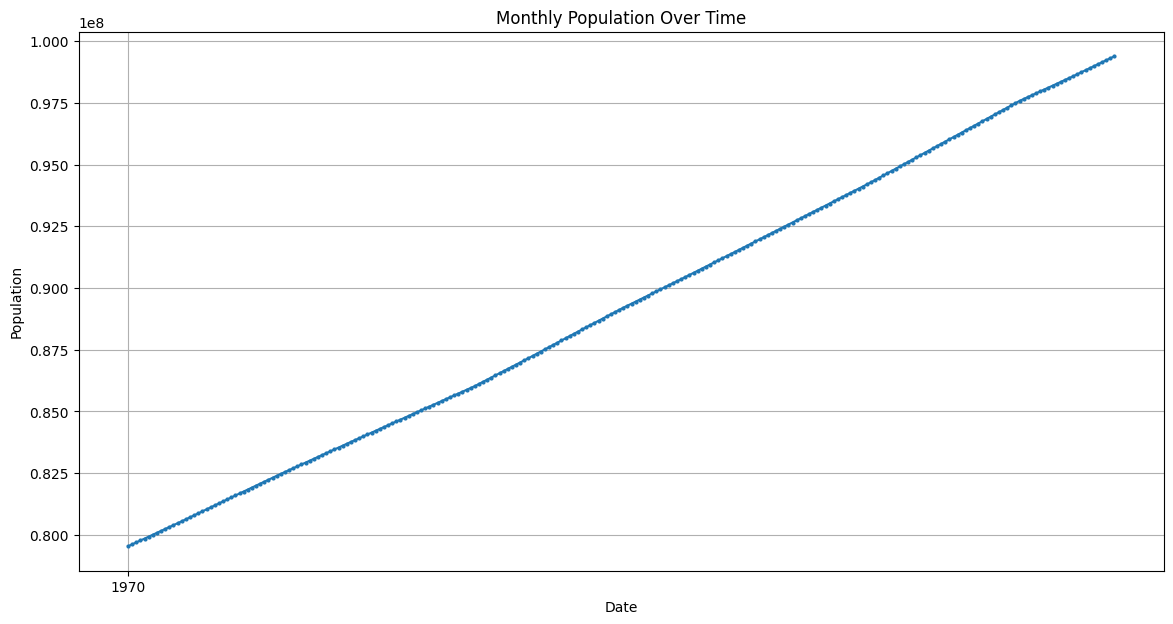

In [220]:
# Vẽ đồ thị
plt.figure(figsize=(14, 7))
plt.plot(population_df_train.index, population_df_train['Population'], marker='o', markersize=2)

# Thiết lập nhãn cho trục x và trục y
plt.xlabel('Date')
plt.ylabel('Population')
plt.title('Monthly Population Over Time')

# Định dạng nhãn trục x để hiển thị mỗi năm một lần
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hiển thị đồ thị
plt.grid(True)
plt.show()

## 2.2 Check for stationarity using time series plotting using ACF Plot and PACF Plot

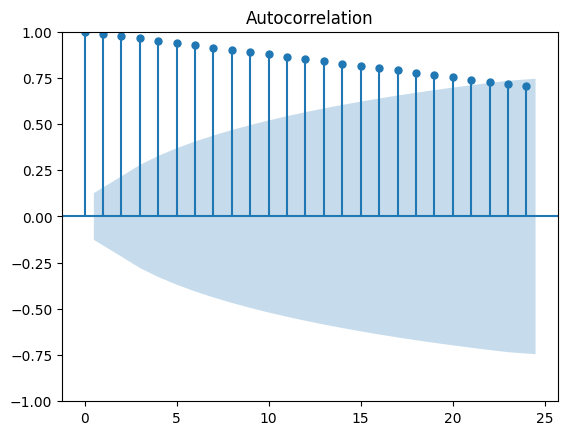

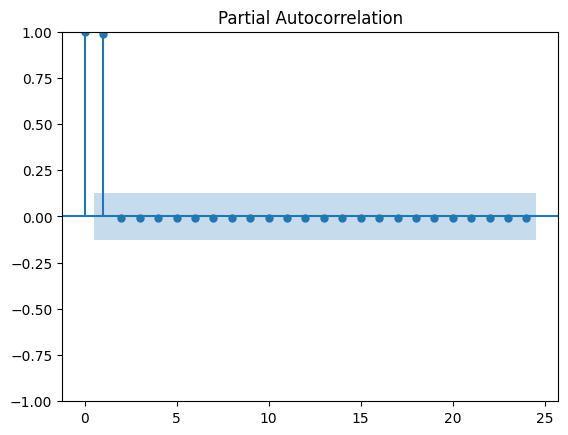

In [221]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'population_df' is your DataFrame
# Select the 'Population' column
population_series_train = population_df_train['Population']

# Plot ACF and PACF
acf_original = plot_acf(population_series_train)
pacf_original = plot_pacf(population_series_train)

## 2.3 Check for stationarity using time series plotting using ADF test

In [222]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(population_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.9837243452632933


## 2.4 Transform to stationary: differencing

<Axes: >

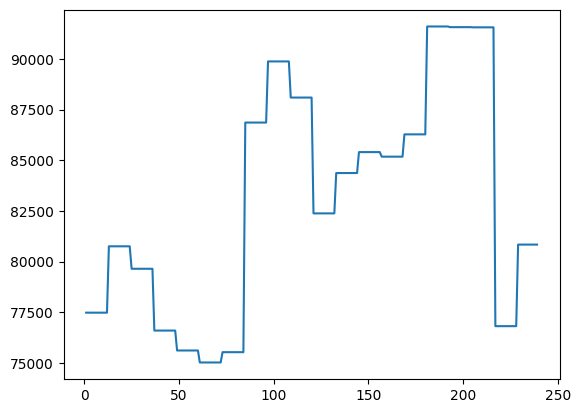

In [223]:
df_train_diff1 = population_series_train.diff().dropna()
df_train_diff1.plot()

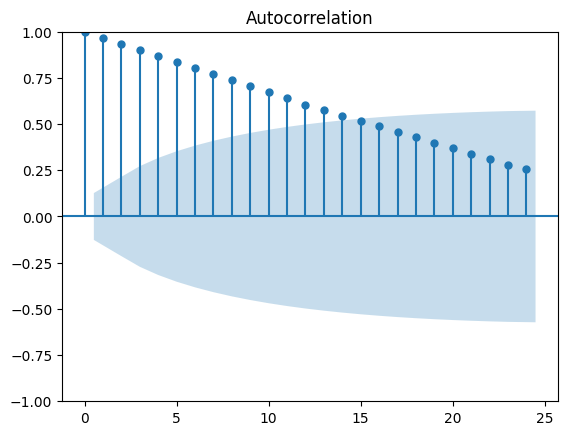

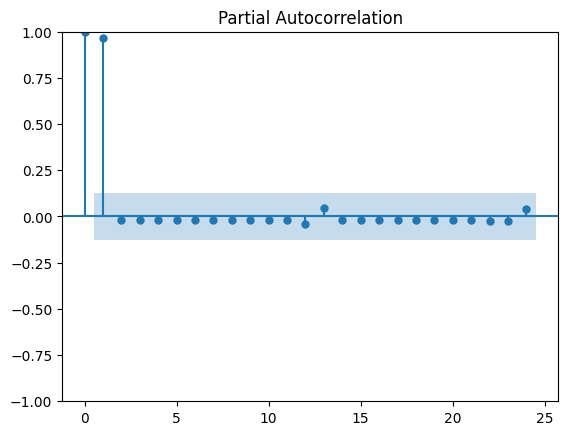

In [224]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [225]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 0.2779901712394786


<Axes: >

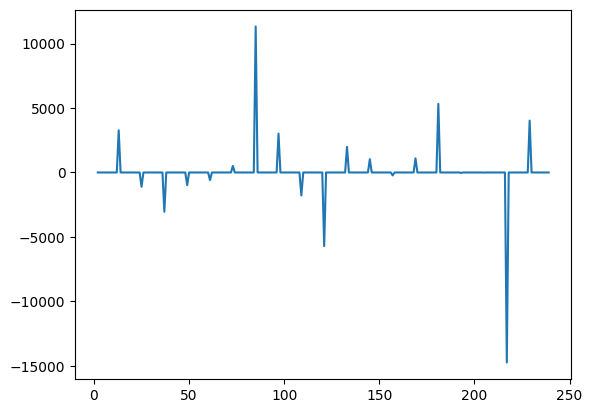

In [226]:
# Calculate the second differenced series
df_train_diff2 = df_train_diff1.diff().dropna()
df_train_diff2.plot()

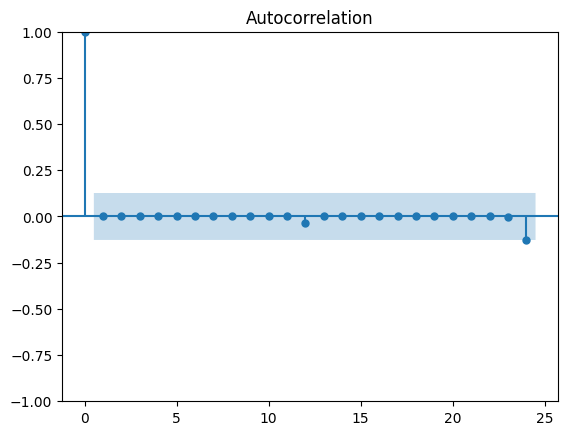

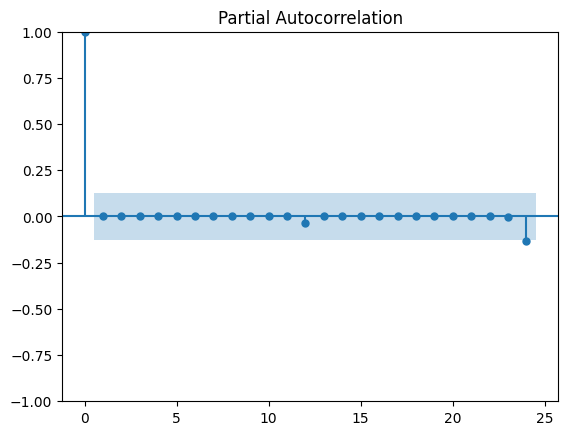

In [227]:
acf_diff2 = plot_acf(df_train_diff2)
pacf_diff2 = plot_pacf(df_train_diff2)

In [228]:
adf_test2 = adfuller(df_train_diff2)
print(f'p-value: {adf_test2[1]}')

p-value: 3.9427671696772263e-28


## 2.5: Determine ARIMA models parameters p, q

Giải thích....

## 2.5 Grid Search using Auto-fit to survey parameters p, d, q

In [229]:
import pmdarima as pm

auto_arima = pm.auto_arima(population_series_train, 
                           start_p=0, start_d=0, start_q=0,
                           max_p=5, max_d=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=None, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)  # Không cố định d

print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4126.687, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4128.712, Time=0.00 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4128.744, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4124.719, Time=0.00 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4130.723, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.159 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -2061.360
Date:                Sun, 26 May 2024   AIC                           4124.719
Time:                        21:32:13   BIC                           4128.192
Sample:                             0   HQIC                          4126.119
                                - 240                                       

## 2.6 Fit the ARIMA model

In [230]:
from statsmodels.tsa.arima.model import ARIMA

# Tạo mô hình ARIMA với tham số (0, 2, 0)
population_model = ARIMA(population_series_train, order=(0, 2, 0))

# Huấn luyện mô hình
fitted_population_model = population_model.fit()

# In ra tóm tắt mô hình
print(fitted_population_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                  240
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2061.360
Date:                Sun, 26 May 2024   AIC                           4124.719
Time:                        21:32:13   BIC                           4128.192
Sample:                             0   HQIC                          4126.119
                                - 240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.936e+06   2.93e+04     66.028      0.000    1.88e+06    1.99e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             49110.46
Prob(Q):                              1.00   Pr

In [231]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_population_model, path_population_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\population.pkl']

## 2.7 Make time series predictions

In [286]:
population_series_test = population_df_test['Population']

In [287]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", population_series_train.index[-1])
print("First index of test data:", population_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = population_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(population_series_test)  # kết thúc sau đó bằng độ dài của test
population_series_test.index = range(start_index, end_index)

# Nối hai series
population_series = pd.concat([population_series_train, population_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(population_series.head())
print(population_series.tail())


Last index of train data: 239
First index of test data: 240
0    79537700.0
1    79615175.0
2    79692650.0
3    79770125.0
4    79847600.0
Name: Population, dtype: float64
247    9.998415e+07
248    1.000570e+08
249    1.001298e+08
250    1.002026e+08
251    1.002754e+08
Name: Population, dtype: float64


In [288]:
# Tải mô hình từ file
loaded_population_model = joblib.load(path_population_model)

population_series_prediction = loaded_population_model.forecast(len(population_series_test))

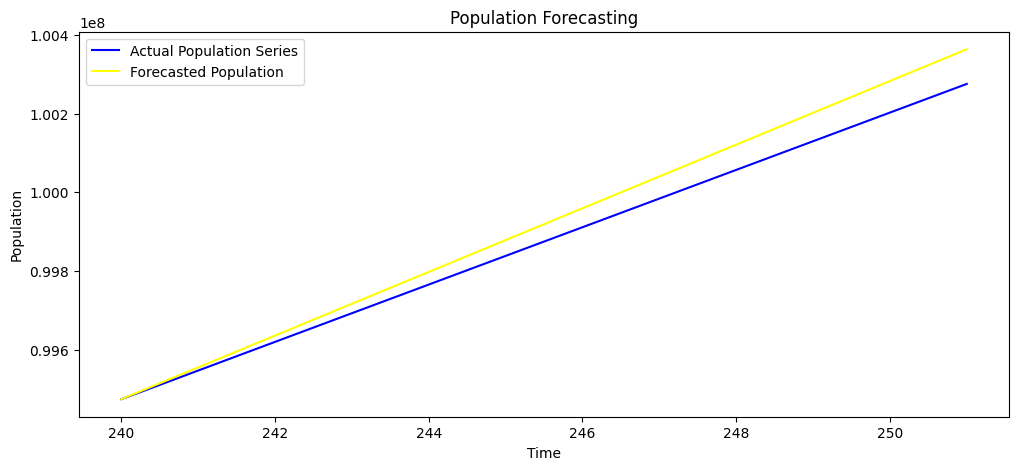

In [301]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series_test, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(population_series_train), len(population_series_train) + len(population_series_prediction))
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


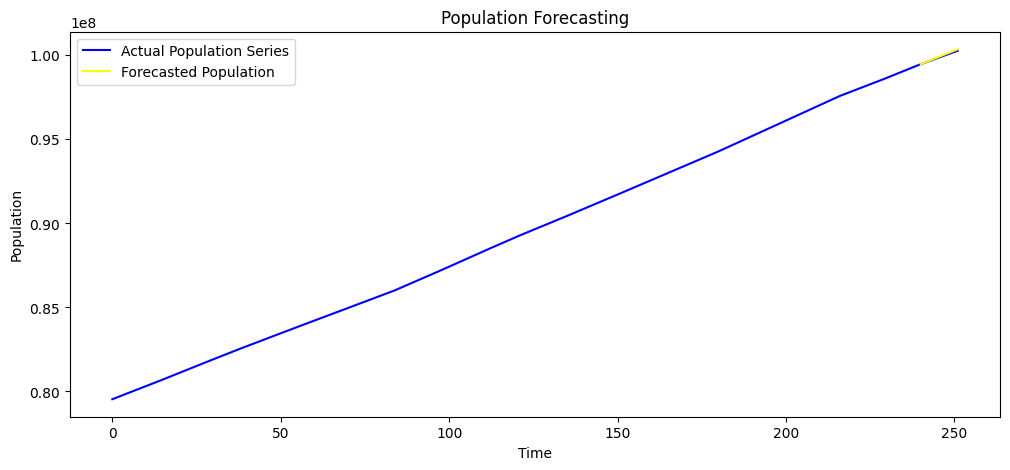

In [302]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(population_series, color='blue', label='Actual Population Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của population_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(population_series_train), len(population_series_train) + len(population_series_prediction))
plt.plot(prediction_index, population_series_prediction, color='yellow', label='Forecasted Population')

# Thêm tiêu đề và nhãn
plt.title('Population Forecasting')
plt.xlabel('Time')
plt.ylabel('Population')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


## 2.8 Evaluate model predictions

In [305]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(population_series_test, population_series_prediction)
mape = mean_absolute_percentage_error(population_series_test, population_series_prediction)
rmse = np.sqrt(mean_squared_error(population_series_test, population_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 44087.083333333336
mape - manual: 0.0004407284031023954
rmse - manual: 52051.50792869447
